# Statistics of target objects and analysing

## In order to better tuning RetinaNet, a statistics of objects' ratio(h/w) and scale(pixels of bboxs) should be done.  These statistics will help to determine what layers should be used and the configuration of anchor box. 

### 1. Read in data and display

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
anno_path = 'data/train.csv'
df = pd.read_csv(anno_path, names=['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
df.head()

,img_path,xmin,ymin,xmax,ymax,label
0,/Users/gkai/project/keras-retinanet/data/train...,977,134,1121,184,title
1,/Users/gkai/project/keras-retinanet/data/train...,455,236,642,264,singleText
2,/Users/gkai/project/keras-retinanet/data/train...,681,287,755,327,singleText
3,/Users/gkai/project/keras-retinanet/data/train...,1272,267,1594,623,textBlock
4,/Users/gkai/project/keras-retinanet/data/train...,1502,264,1637,407,stamp


In [3]:
df.describe()

,xmin,ymin,xmax,ymax
count,7735.000000,7735.000000,7735.000000,7735.000000
mean,117.589657,296.942211,914.040336,705.099677
std,160.827518,166.143598,126.946758,180.252333
min,1.000000,33.000000,55.000000,71.000000
25%,45.000000,172.000000,934.000000,630.000000
50%,73.000000,249.000000,956.000000,751.000000
75%,98.000000,371.000000,971.000000,827.000000
max,892.000000,928.000000,1024.000000,1019.000000


In [3]:
# df = df[df['label']!='AnyTable']

In [4]:
width = df['xmax'] - df['xmin']
hight = df['ymax'] - df['ymin']
ratios = hight/ width
ratios = ratios.round(2)
statis = pd.concat([hight, width, ratios], axis=1, keys=['hight', 'width', 'ratio'], )

In [5]:
statis.head()

,hight,width,ratio
0,50,144,0.35
1,28,187,0.15
2,40,74,0.54
3,356,322,1.11
4,143,135,1.06


In [6]:
statis.describe()

,hight,width,ratio
count,8253.00000,8253.000000,8253.000000
mean,130.73028,439.457773,0.366776
std,204.91578,341.548897,0.454568
min,13.00000,12.000000,0.020000
25%,40.00000,175.000000,0.120000
50%,66.00000,359.000000,0.220000
75%,128.00000,574.000000,0.480000
max,1439.00000,1972.000000,13.000000


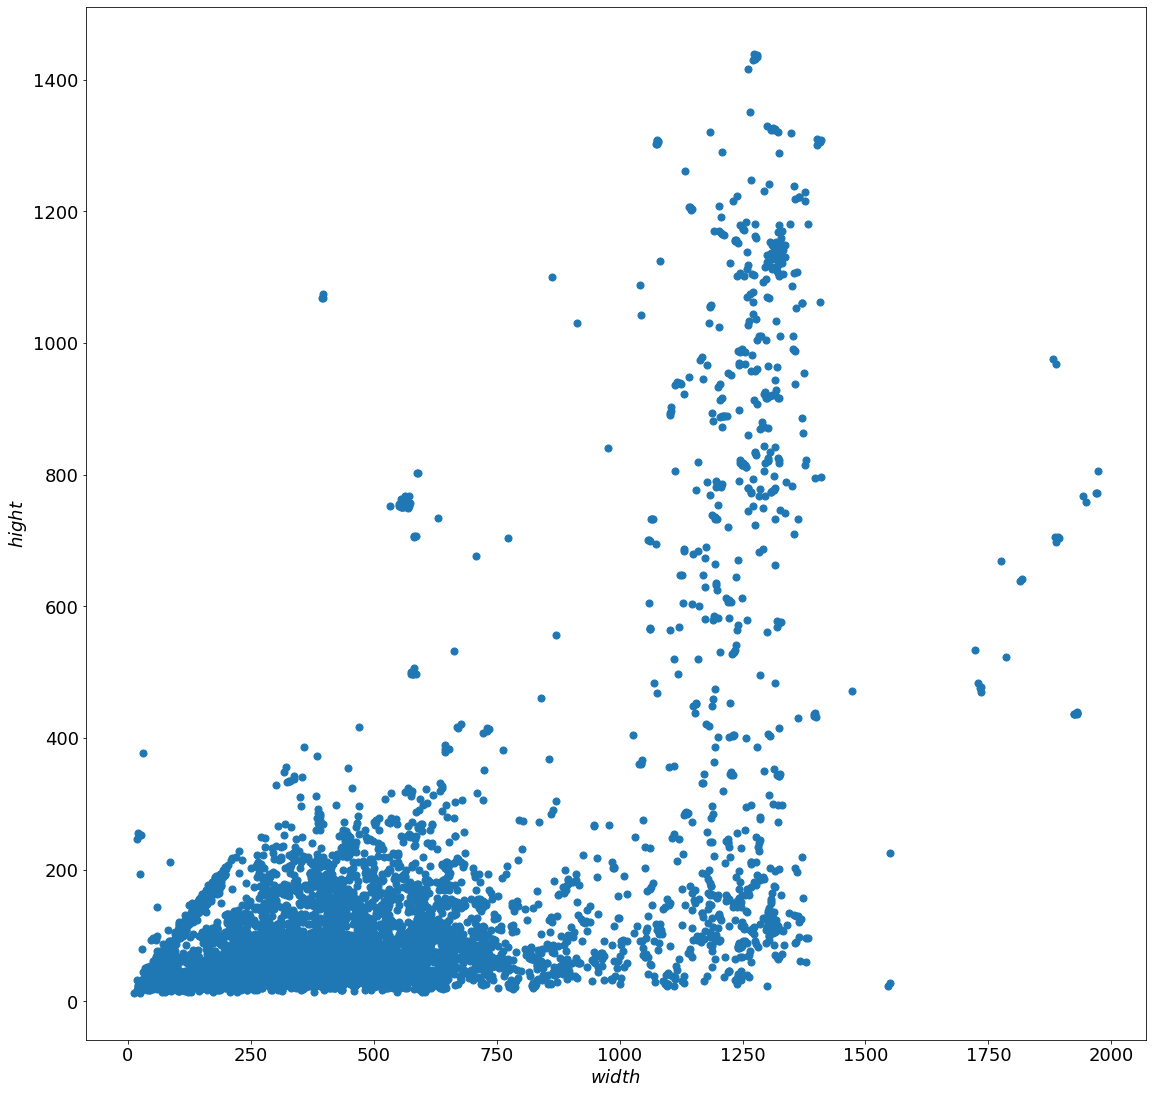

In [7]:
ax = statis.plot(kind="scatter", x="width", y="hight", figsize=(19,19), s=50)
plt.xlabel("$width$", fontsize=18)
plt.ylabel("$hight$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [10]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
import numpy as np

In [11]:
km_num = 10
## Take note that the latest version of Kmeans my behave slightly different.  
kmeans = KMeans(n_clusters=km_num)
model = kmeans.fit(statis[['hight', 'width']])
# Now, we can get the predicted model labels, or Centroids, in the form of an array:

print(model)
ratios_cl = model.cluster_centers_[:,0]/model.cluster_centers_[:,1]
ratios_cl = ratios_cl.round(decimals=2)
print('\nratios distribution',np.sort(ratios_cl))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

ratios distribution [0.1  0.13 0.17 0.22 0.23 0.33 0.59 0.61 0.89 1.16]


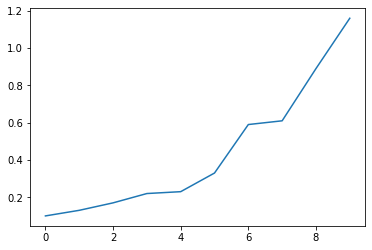

In [12]:
plt.plot(range(len(ratios_cl)), np.sort(ratios_cl))
plt.show()

In [13]:
model.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [14]:
# attach predicted cluster to original points
statis['predicted'] = model.labels_
# Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(model.cluster_centers_, columns=['hight', 'width'])

In [15]:
color_map = [
    [0    ,255,     0] ,
    [31  , 0   , 255] ,
    [255  , 0   ,     0] ,
    [0   , 159 , 255] ,
    [200 , 95  , 0]   ,
    [122  , 89  , 156] ,
    [170 , 200 , 0]   ,
    [20  , 120 , 82]  ,
    [108 , 10 , 70]   ,
    [0   , 25  , 255] ,
    [255 , 248 , 0]   ,
    [0   , 255  , 255] ,
    [255 , 19  , 0]   ,
    [170 , 30   , 100]   ,
    [255 , 38  , 0]   ,
    [0   , 255 , 25]  ,
    [255 , 0   , 133] ,
    [255 , 172 , 0]   ,
    [108 , 0   , 255] ,
    [0   , 82  , 255] ,
    [0   , 255 , 6]   ,
    [255 , 0   , 152] ,
    [223 , 0   , 255] ,
    [12  , 0   , 255] ,
    [0   , 255 , 178] ,
    [184 , 0   , 255] ,
    [255 , 0   , 76]  ,
    [146 , 255 , 0]   ,
    [51  , 0   , 255] ,
    [0   , 197 , 255] ,
    [255 , 0   , 19]  ,
    [255 , 0   , 38]  ,
    [89  , 255 , 0]   ,
    [255 , 153 , 0]   ,
    [0   , 255 , 255] ,
    [0   , 255 , 216] ,
    [0   , 255 , 121] ,
    [255 , 0   , 248] ,
    [70  , 0   , 255] ,
    [0   , 255 , 159] ,
    [0   , 216 , 255] ,
    [0   , 6   , 255] ,
    [0   , 63  , 255] ,
    [31  , 255 , 0]   ,
    [255 , 57  , 0]   ,
    [255 , 0   , 210] ,
    [0   , 255 , 102] ,
    [242 , 255 , 0]   ,
    [255 , 191 , 0]   ,
    [0   , 255 , 63]  ,
    [255 , 0   , 95]  ,
    [146 , 0   , 255] ,
    [184 , 255 , 0]   ,
    [255 , 114 , 0]   ,
    [0   , 255 , 235] ,
    [255 , 229 , 0]   ,
    [0   , 178 , 255] ,
    [255 , 0   , 114] ,
    [255 , 0   , 57]  ,
    [0   , 140 , 255] ,
    [0   , 121 , 255] ,
    [12  , 255 , 0]   ,
    [255 , 210 , 0]   ,
    [0   , 255 , 44]  ,
    [165 , 255 , 0]   ,
    [0   , 255 , 140] ,
    [0   , 101 , 255] ,
    [223 , 255 , 0]   ,
    [242 , 0   , 255] ,
    [89  , 0   , 255] ,
    [165 , 0   , 255] ,
    [70  , 255 , 0]   ,
    [255 , 0   , 172] ,
    [255 , 76  , 0]   ,
    [203 , 255 , 0]   ,
    [204 , 0   , 255] ,
    [255 , 0   , 229] ,
    [255 , 133 , 0]   ,
    [127 , 0   , 255] ,
    [0   , 235 , 255] ,
    [0   , 255 , 197] ,
    [255 , 0   , 191] ,
    [50  , 255 , 0]
]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


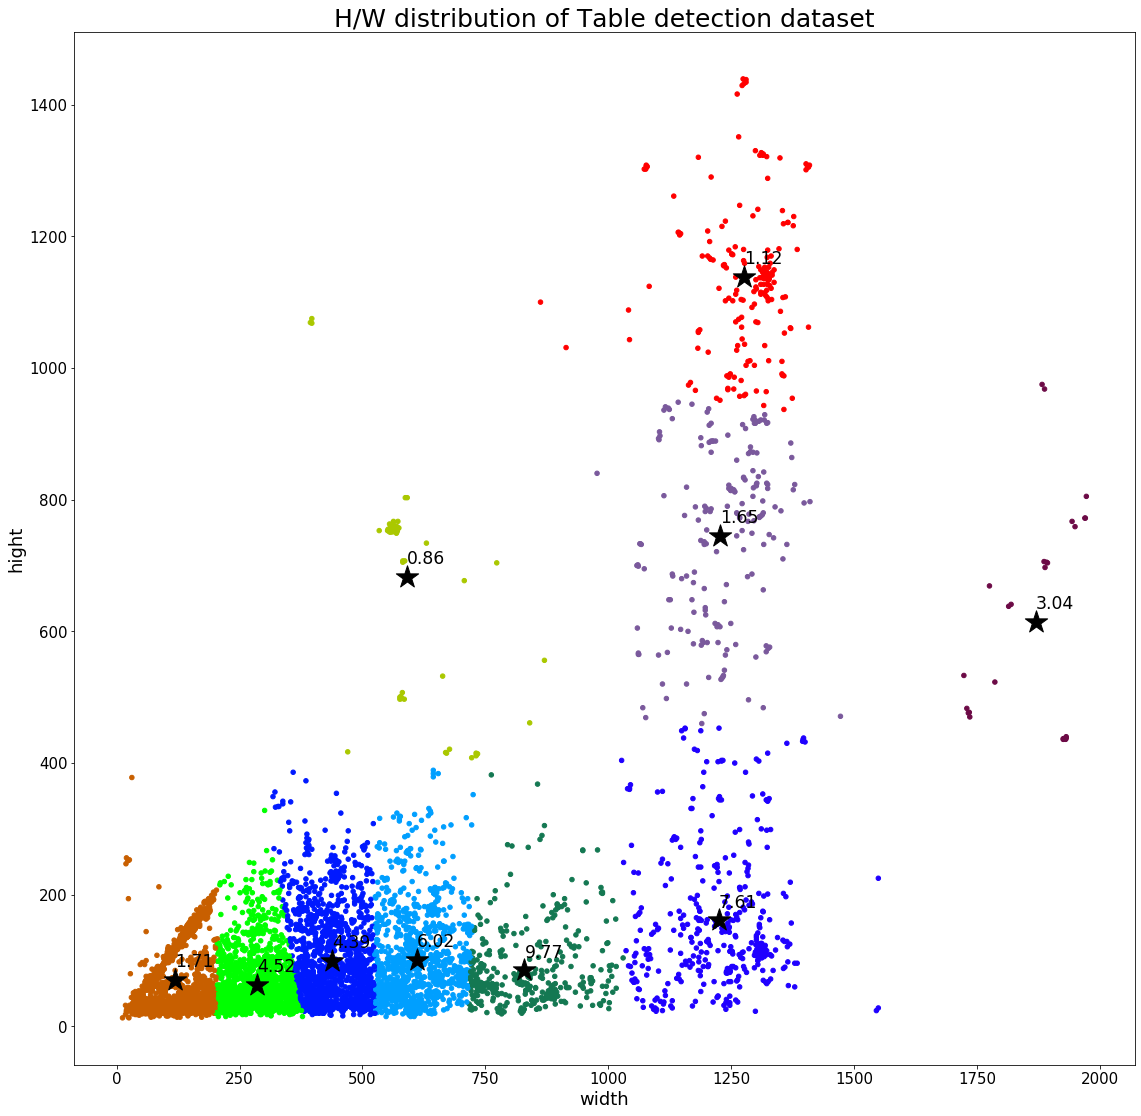

In [16]:

## Plot scatter by cluster / color, and centroids
colors = np.array(color_map[:km_num], dtype=np.float)
# print(colors_raw)
norm = np.array([255.0,255.0,255.0], dtype=np.float)
colors = [x/norm for x in colors]
# colors_raw = colors_raw.round(3)
# colors = colors_raw[:km_num]
# print(colors)
statis['color'] = statis['predicted'].map(lambda p: colors[p])
# print(statis['color'])

ax = statis.plot(    
    kind="scatter", 
    x="width", y="hight",
    c = statis['color'],
    figsize=(19,19),
    fontsize=15
)
ax.set_title("H/W distribution of Table detection dataset", fontsize=25)
ax.set_xlabel('Width', fontsize=18)
ax.set_ylabel('Height', fontsize=18)

for idx, row in centroids.iterrows():
    ratio = round(row[1]/row[0], 2)
    ax.annotate(ratio, (row[1], row[0]+20),size='xx-large')
    
bx = centroids.plot(
    kind="scatter", 
    x="width", y="hight", 
    marker="*", c=[0,0,0],
    ax=ax,s=550,
    figsize=(19,19)
)


In [17]:
new_df = statis.sort_values(by='ratio' ,ascending=True)
# new_df = sorted_ratios.to_frame()
# new_df.columns=['h_w_ratio']
new_df.iloc[:, :2].describe()

,hight,width
count,8253.00000,8253.000000
mean,130.73028,439.457773
std,204.91578,341.548897
min,13.00000,12.000000
25%,40.00000,175.000000
50%,66.00000,359.000000
75%,128.00000,574.000000
max,1439.00000,1972.000000


In [18]:
import numpy as np

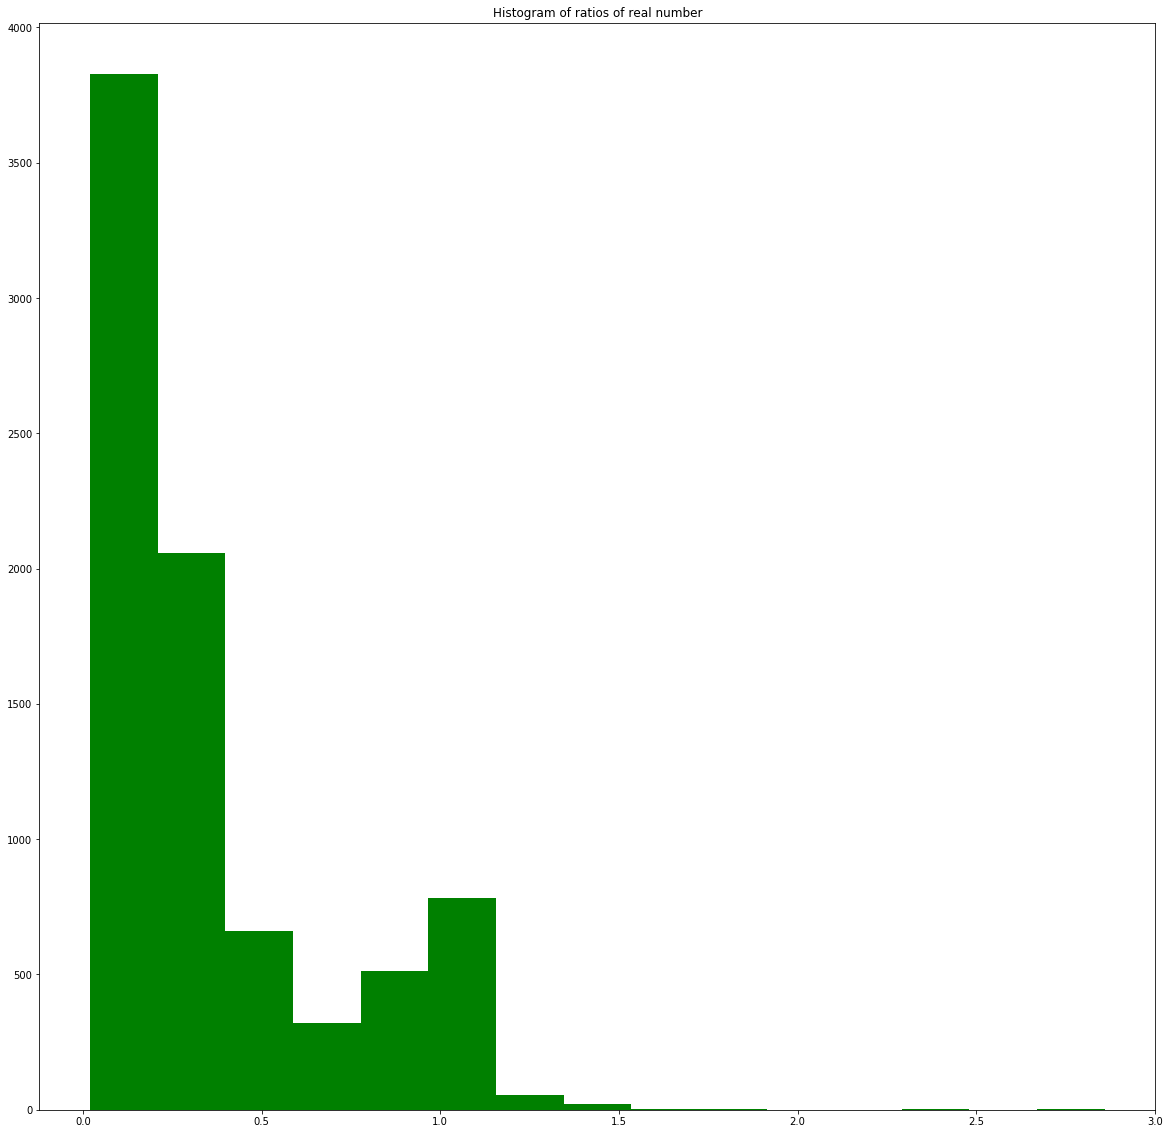

In [19]:
fig= plt.figure(figsize=(20,20))
counts, rates, _ = plt.hist(new_df['ratio'][new_df['ratio']<5.0].values,  bins=15,rwidth=1, color='g')
# plt.xticks(np.arange(0.0, 10.0, 0.01))
plt.title('Histogram of ratios of real number')
plt.show()

In [20]:
print('ratios\tcounts')
for c, r in zip(counts, rates):
    print('{:.2f}\t{:.0f}'.format(  r, c))

ratios	counts
0.02	3826
0.21	2058
0.40	659
0.59	319
0.78	513
0.97	782
1.16	55
1.35	23
1.53	2
1.72	2
1.91	1
2.10	0
2.29	2
2.48	0
2.67	4


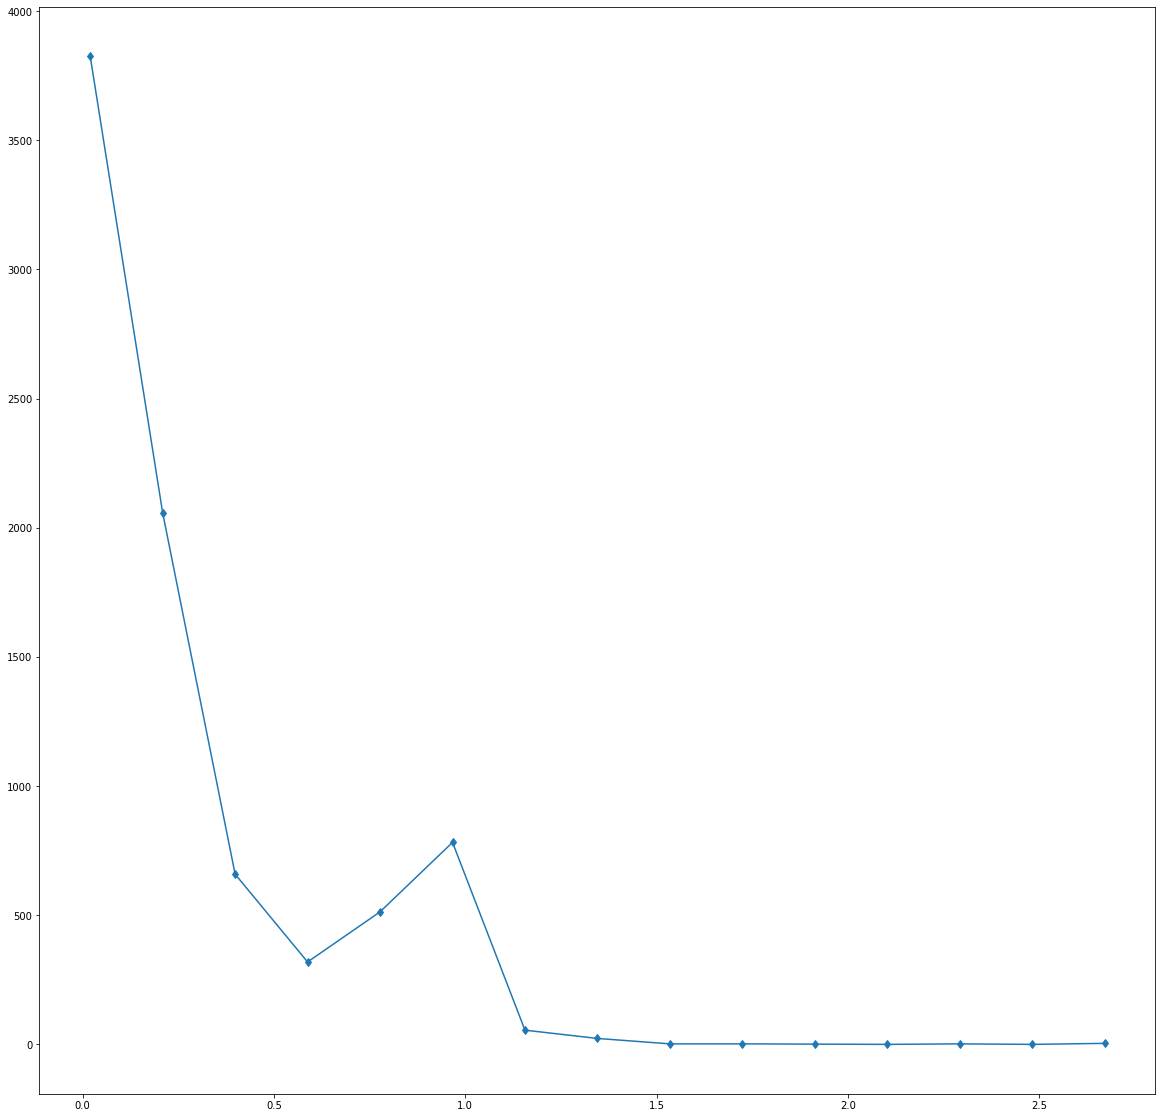

In [21]:
fig= plt.figure(figsize=(20,20))
plt.plot(rates[:-1], counts, '-d')

(array([2.26139927e+00, 7.32329300e-01, 2.21705811e-01, 5.27893205e-01,
        7.84138447e-02, 2.19372066e-02, 1.40024723e-03, 9.33498152e-04,
        0.00000000e+00, 9.33498152e-04, 1.86699630e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.66749076e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.66749076e-04, 0.00000000e+00, 0.00000000e+00,
        4.66749076e-04, 0.00000000e+00, 4.66749076e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.66749076e-04, 0.00000000e+00,
        0.00000000e+00, 9.33498152e-04]),
 array([ 0.02  ,  0.2796,  0.5392,  0.7988,  1.0584,  1.318 ,  1.5776,
         1.8372,  2.096

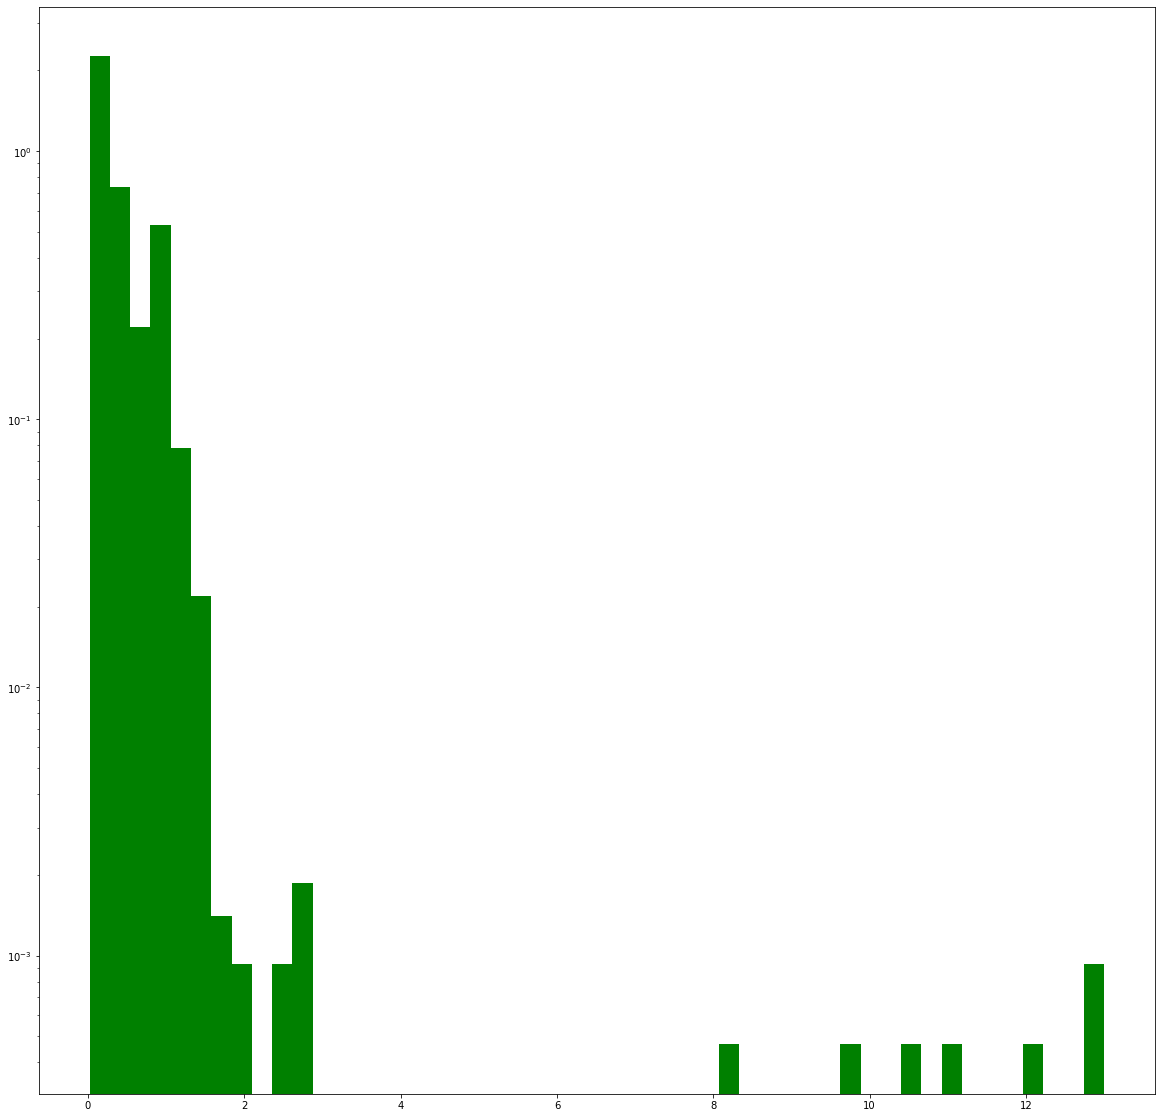

In [22]:
# counts, bins = np.histogram(new_df.val)
fig= plt.figure(figsize=(20,20))
plt.hist(new_df['ratio'].values, bins=50, density=True,rwidth=1, color='g', log=True)

From the histgram we observed that 

In [23]:
nne = pd.DataFrame(list(zip(x,y)), columns=['ratios', 'counts'])
nne.head()
# new_df.plot(kind='box', figsize=[20,20])

NameError: name 'x' is not defined

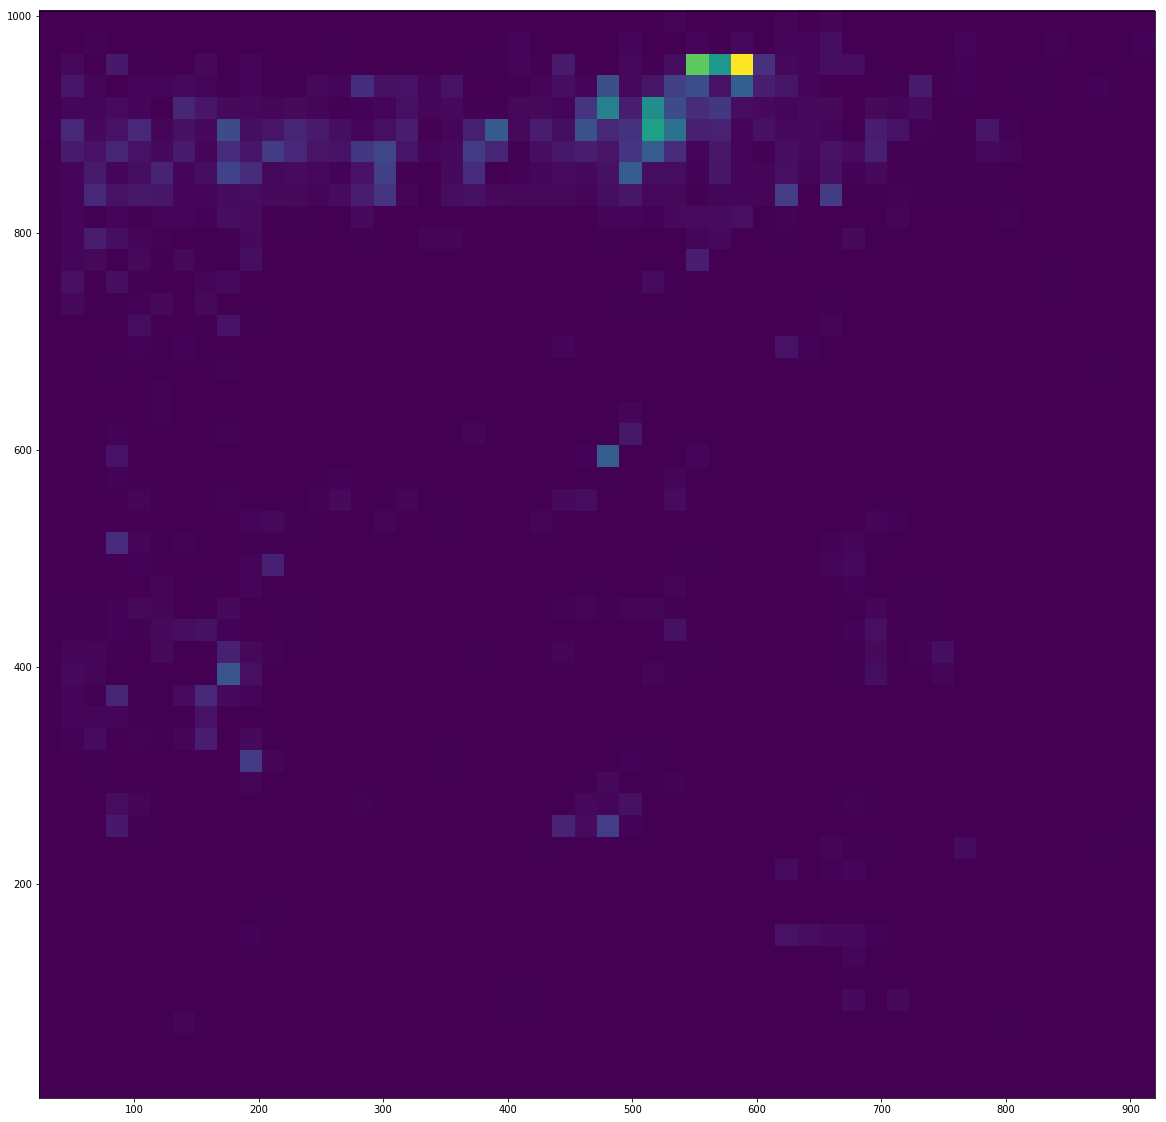

In [20]:
fig= plt.figure(figsize=(20,20))
plt.hist2d(x=new_df['hight'], y=new_df['width'], bins=50)
plt.show()